In [ ]:
import tensorflow as tf
from keras import layers,models
from tensorflow.keras.datasets import mnist

In [ ]:
# Load the mnist dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
# checking the shape of the data
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (60000, 28, 28)
Shape of x_test (10000, 28, 28)
Shape of y_train (60000,)
Shape of y_test (10000,)


In [ ]:
# Normalize the pixel values between 0 and 1
x_train ,x_test = x_train/255 , x_test/255

In [ ]:
# Adding a channel for Gray Scale
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [ ]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Creating Convnets / CNN model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.2131 - accuracy: 0.9347 - val_loss: 0.0682 - val_accuracy: 0.9782
Epoch 2/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0743 - accuracy: 0.9760 - val_loss: 0.0758 - val_accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0458 - val_accuracy: 0.9855
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0488 - val_accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0471 - val_accuracy: 0.9864


In [ ]:
# Evaluate the model
test_loss , test_acc = model.evaluate(x_test,y_test)
print(f'Test Accuracy : { test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0471 - accuracy: 0.9864
Test Accuracy : 0.9864000082015991


In [ ]:
# Making predictions
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 132ms/step


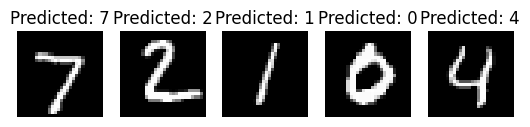

In [ ]:
# Visualize the result
import matplotlib.pyplot as plt
import numpy as np

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title(f'Predicted: {np.argmax(predictions[i])}')
  plt.axis('off')